此程式可以把圖片轉成山水畫


以下為控制邊緣偵測的數值
使用的是Canny來進行邊緣偵測

請輸入參數threshold1 門檻值，範圍 0～255
推薦值為5，不推薦超過30
你輸入的值 : 5

請輸入參數threshold2 門檻值，範圍 0～255
推薦值為90，不推薦超過200
你輸入的值 : 90


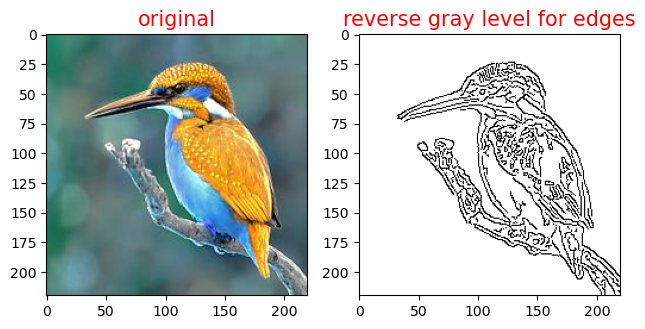


是否要重新輸入參數threshold1跟threshold2
是請輸入1
否請輸入2
你輸入的值 : 2


以下為遮罩半徑的數值
此遮罩會偵測各像素點半徑範圍內是否有其他邊緣資訊
若沒有則判定該像素點為噪點

請輸入遮罩半徑
推薦值為6
不推薦超過10
你輸入的值 : 6


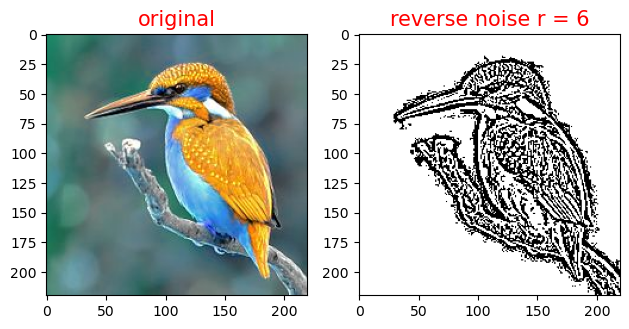


請問要返回上個步驟，或是要重新輸入遮罩半徑
回到上一步請輸入1
要重新輸入遮罩半徑請輸入2
不重新輸入遮罩半徑請輸入3
你輸入的值 : 3

演示結束



In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time
'''from google.colab.patches import cv2_imshow
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')'''

def change(img):  #對影像灰階值做倒數
    nr, nc = img.shape[:2]
    new_img = np.zeros((nr, nc), np.uint8)  #建立一新影像且灰階值為0

    for x in range(nr):
        for y in range(nc):
            if img[x][y] == 0:  #若傳進來的影像目前位置灰階值為0，則新影像同樣位置灰階值設為1
                new_img[x][y] = 255

    return new_img  #回傳該影像

def reduce_noise(img, edges, radius):  #若灰階影像中各相素點半徑(radius)內邊緣影像有值則將其保留，若否則將該相素點刪除
    nr, nc = img.shape[:2]
    new_img = img.copy()  #複製一新影像
    has_edges = 0  #檢測半徑內是否有邊緣資訊
    edges_x = edges_y = 0  #紀錄半徑內的X,Y軸的值

    for x in range(nr):
        for y in range(nc):
            if img[x][y] == 0:
                for round_x in range(2 * radius + 1):  #檢測目前位置加上或減去半徑後是否會超過影像範圍
                    for round_y in range(2 * radius + 1):
                        if (x - radius + round_x) < 0:
                            edges_x = 0

                        elif (x - radius + round_x) >= nr:
                            edges_x = nr - 1

                        else:
                            edges_x = x - radius + round_x

                        if (y - radius + round_y) < 0:
                            edges_y = 0

                        elif (y - radius + round_y) >= nc:
                            edges_y = nc - 1

                        else:
                            edges_y = y - radius + round_y

                        if edges[edges_x][edges_y] == 0:  #若在半徑內有邊緣資訊，則記錄有邊緣
                          has_edges = 1

            if has_edges == 0:  #若半徑內無邊緣資訊則將新影像的該點的灰階值設為255
                new_img[x][y] = 255

            has_edges = 0
    return new_img

#img = cv2.imread("/content/drive/My Drive/a.jpg", -1)
img = cv2.imread("./bird.jpg")  #讀取影像

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #將讀取的影像轉換為灰階影像
gaussian_img = cv2.GaussianBlur(gray_img, (5, 5), 0)  #將讀取的影像透過高斯濾波將影像平滑化，以此來減少背景躁點
menu=1
print("此程式可以把圖片轉成山水畫\n\n")

while True:
  if menu == 1:
    print("以下為控制邊緣偵測的數值\n使用的是Canny來進行邊緣偵測\n")
    time.sleep(5)  #有時候會有執行過快因而順序錯亂的情況發生
    threshold1 = int(input("請輸入參數threshold1 門檻值，範圍 0～255\n推薦值為5，不推薦超過30\n你輸入的值 : "))
    threshold2 = int(input("\n請輸入參數threshold2 門檻值，範圍 0～255\n推薦值為90，不推薦超過200\n你輸入的值 : "))

    edges_img = cv2.Canny(gaussian_img, threshold1, threshold2)#影像邊緣偵測
    edges_img = change(edges_img)  #因為Canny所生成之邊緣影像的邊緣為白色背景為黑色，故將其黑白顛倒

    imgs=[img, edges_img]
    titles=['original', 'reverse gray level for edges']

    for i in range(2):
      plt.subplot(1,2,i+1)
      plt.title(titles[i], fontsize=15, color = 'r')
      plt.imshow(imgs[i], cmap = 'gray')

    plt.tight_layout()
    plt.show()
    time.sleep(5)

    control = int(input("\n是否要重新輸入參數threshold1跟threshold2\n是請輸入1\n否請輸入2\n你輸入的值 : "))

    if 1 <= control <= 2 :
      menu = control

    else:
      print("\n輸入錯誤請重試\n")

  if menu == 2:
    adaptive_theshold_gaussian = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)#將影像透過高斯法的適應性閥值化來將灰階影像變為只有黑白兩色
    
    print("\n\n以下為遮罩半徑的數值\n此遮罩會偵測各像素點半徑範圍內是否有其他邊緣資訊\n若沒有則判定該像素點為噪點")
    radius=int(input("\n請輸入遮罩半徑\n推薦值為6\n不推薦超過10\n你輸入的值 : "))
    reduce_noise_img = reduce_noise(adaptive_theshold_gaussian, edges_img, radius)  #透過邊緣資訊來將不必要的地方刪除

    imgs=[img, reduce_noise_img]
    titles=['original','reverse noise r = '+str(radius)]

    for i in range(2):
      plt.subplot(1, 2, i+1)
      plt.title(titles[i], fontsize = 15, color = 'r')
      plt.imshow(imgs[i], cmap = 'gray')

    plt.tight_layout()
    plt.show()
    time.sleep(10)

    control=int(input("\n請問要返回上個步驟，或是要重新輸入遮罩半徑\n回到上一步請輸入1\n要重新輸入遮罩半徑請輸入2\n不重新輸入遮罩半徑請輸入3\n你輸入的值 : "))

    if 1 <= control <= 3:
      menu = control

    else:
      print("\n輸入錯誤請重試\n")

  if menu==3:
    break

print("\n演示結束\n")